# Advanced Linear Regression


## House price prediction 

### Problem statement

Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Observation and inference

In [1]:
# importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
dt = pd.read_csv("train.csv", encoding = 'utf-8')
dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### To observe the data 


In [3]:
dt.shape

(1460, 81)

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
dt.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Data Cleaning 
Checking for null or missing values 

In [8]:
dt.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
null = pd.DataFrame(round(dt.isnull().sum()/len(dt.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null.head()

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26


In [10]:
null_dt = null[null["Null %"] > 0]
null_dt

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


Th below are removed as  there are many missing values 
<br> PoolQC	<br> MiscFeature <br> Alley	<br> Fence	<br> FireplaceQu	

In [11]:


dt = dt.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)


In [12]:
dt.shape

(1460, 75)

In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [14]:
dt.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [36]:
# Checking for percentage nulls
round(100*(dt.isnull().sum()/len(dt.index)), 2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

In [15]:
null = pd.DataFrame(round(dt.isnull().sum()/len(dt.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_dt = null[null["Null %"] > 0]
null_dt

,Null %
Features,
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53


In [16]:
dt.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [18]:
#Categorical columns
dt.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
# Numeric columns
dt.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
# lets observe the columsn with highest percentage of missing values
print('The unique values in columsn with highest number if nan or missing values')
print('\n')
print('LotFrontage: ',dt['LotFrontage'].value_counts())
print('\n')
print('GarageCond: ',dt['GarageCond'].value_counts())
print('\n')
print('GarageType: ',dt['GarageType'].value_counts())
print('\n')
print('GarageYrBlt: ',dt['GarageYrBlt'].value_counts())
print('\n')
print('GarageFinish: ',dt['GarageFinish'].value_counts())
print('\n')
print('GarageQual: ',dt['GarageQual'].value_counts())
print('\n')
print('BsmtExposure: ',dt['BsmtExposure'].value_counts())
print('\n')
print('BsmtFinType2: ',dt['BsmtFinType2'].value_counts())
print('\n')
print('BsmtFinType1: ',dt['BsmtFinType1'].value_counts())
print('\n')
print('BsmtCond: ',dt['BsmtCond'].value_counts())
print('\n')
print('BsmtQual: ',dt['BsmtQual'].value_counts())
print('\n')
print('MasVnrArea: ',dt['MasVnrArea'].value_counts())
print('\n')
print('MasVnrType: ',dt['MasVnrType'].value_counts())
print('\n')
print('Electrical: ',d['Electrical'].value_counts())


The unique values in columsn with highest number if nan or missing values


LotFrontage:  60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64


GarageCond:  TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


GarageType:  Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


GarageYrBlt:  2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1

In [23]:
# for the LotFrontage column and GarageYrBlt we will impute the missing values with the median since the feature contains outliers
dt['LotFrontage'] = dt['LotFrontage'].fillna(dt['LotFrontage'].median())

dt['GarageYrBlt'] = dt['GarageYrBlt'].fillna(dt['GarageYrBlt'].median())

# for the "below columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    
    dt[col] = dt[col].fillna(dt[col].mode()[0])
    
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    dt[col] = dt[col].fillna(dt[col].mode()[0])
    
# for the columns we will impute the null values with 'mode'

for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    
    dt[col] = dt[col].fillna(dt[col].mode()[0])

In [25]:
null = pd.DataFrame(round(dt.isnull().sum()/len(dt.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_dt = null[null["Null %"] > 0]
null_dt

,Null %
Features,


In [26]:
dt.isnull().values.any()

False

In [27]:
# check Null value
dt.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [28]:
dt.shape

(1460, 75)

In [29]:
dt.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
print(dt['PoolArea'].value_counts())
print(dt['MiscVal'].value_counts())
print(dt['3SsnPorch'].value_counts())

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


In [32]:
# dropping 'PoolArea','MiscVal','3SsnPorch'  as they are not useful 
dt = dt.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [33]:
dt.shape

(1460, 72)

In [34]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [35]:
dt.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


###  Checking  for outlier 

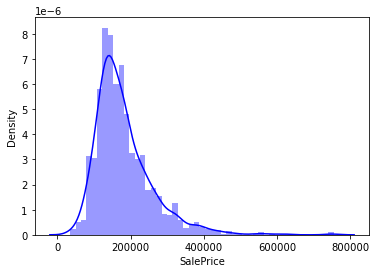

In [36]:
plt.figure()
sns.distplot(dt['SalePrice'],color='b')
plt.show()

In [37]:
dt.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

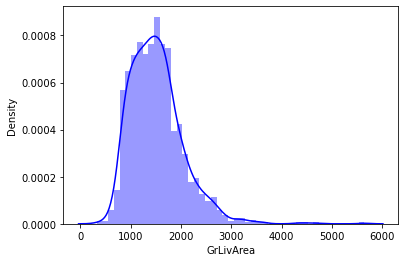

In [39]:
plt.figure()
sns.distplot(dt['GrLivArea'],color='b')
plt.show()

In [41]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] # one or more

Q1 = dt[cols].quantile(0.05)
Q3 = dt[cols].quantile(0.95)
IQR = Q3 - Q1

dt = dt[~((dt[cols] < (Q1 - 1.5 * IQR)) |(dt[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

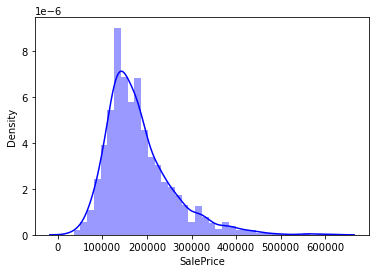

In [42]:
plt.figure()
sns.distplot(dt['SalePrice'],color='b')
plt.show()

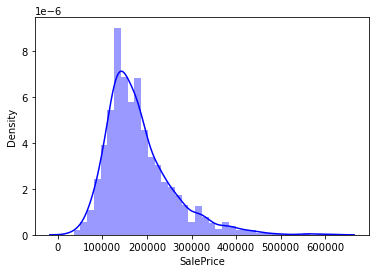

In [43]:
plt.figure()
sns.distplot(dt['SalePrice'],color='b')
plt.show()

In [44]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1329 non-null   int64  
 1   MSZoning       1329 non-null   object 
 2   LotFrontage    1329 non-null   float64
 3   LotArea        1329 non-null   int64  
 4   Street         1329 non-null   object 
 5   LotShape       1329 non-null   object 
 6   LandContour    1329 non-null   object 
 7   Utilities      1329 non-null   object 
 8   LotConfig      1329 non-null   object 
 9   LandSlope      1329 non-null   object 
 10  Neighborhood   1329 non-null   object 
 11  Condition1     1329 non-null   object 
 12  Condition2     1329 non-null   object 
 13  BldgType       1329 non-null   object 
 14  HouseStyle     1329 non-null   object 
 15  OverallQual    1329 non-null   int64  
 16  OverallCond    1329 non-null   int64  
 17  YearBuilt      1329 non-null   int64  
 18  YearRemo

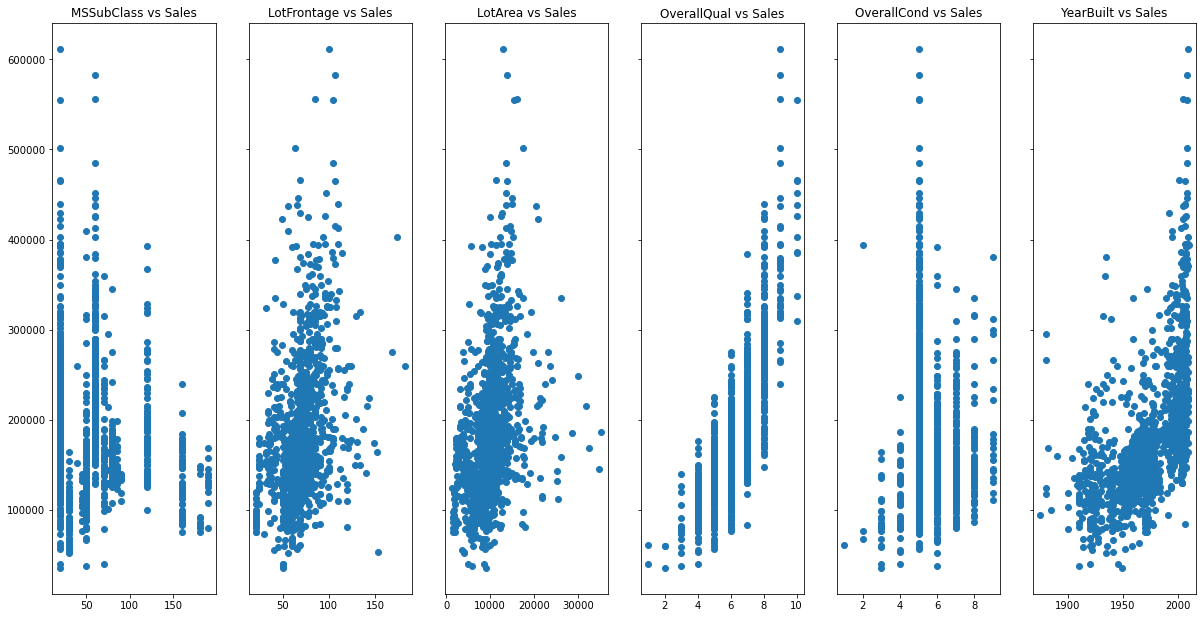

In [46]:
fig, ax = plt.subplots(ncols=6, sharey=True)

MSSubClass = ax[0].scatter(dt['MSSubClass'], dt['SalePrice'])
MSSubClass.set_label("MSSubClass")
ax[0].set_title('MSSubClass vs Sales')

LotFrontage= ax[1].scatter(dt['LotFrontage'], dt['SalePrice'])
LotFrontage.set_label("LotFrontage")
ax[1].set_title('LotFrontage vs Sales')

LotArea = ax[2].scatter(dt['LotArea'], dt['SalePrice'])
LotArea.set_label("LotArea")
ax[2].set_title('LotArea vs Sales')

OverallQual = ax[3].scatter(dt['OverallQual'], dt['SalePrice'])
OverallQual.set_label("LotArea")
ax[3].set_title('OverallQual vs Sales')

OverallCond = ax[4].scatter(dt['OverallCond'], dt['SalePrice'])
OverallCond.set_label("OverallCond")
ax[4].set_title('OverallCond vs Sales')

YearBuilt = ax[5].scatter(dt['YearBuilt'], dt['SalePrice'])
YearBuilt.set_label("YearBuilt")
ax[5].set_title('YearBuilt vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

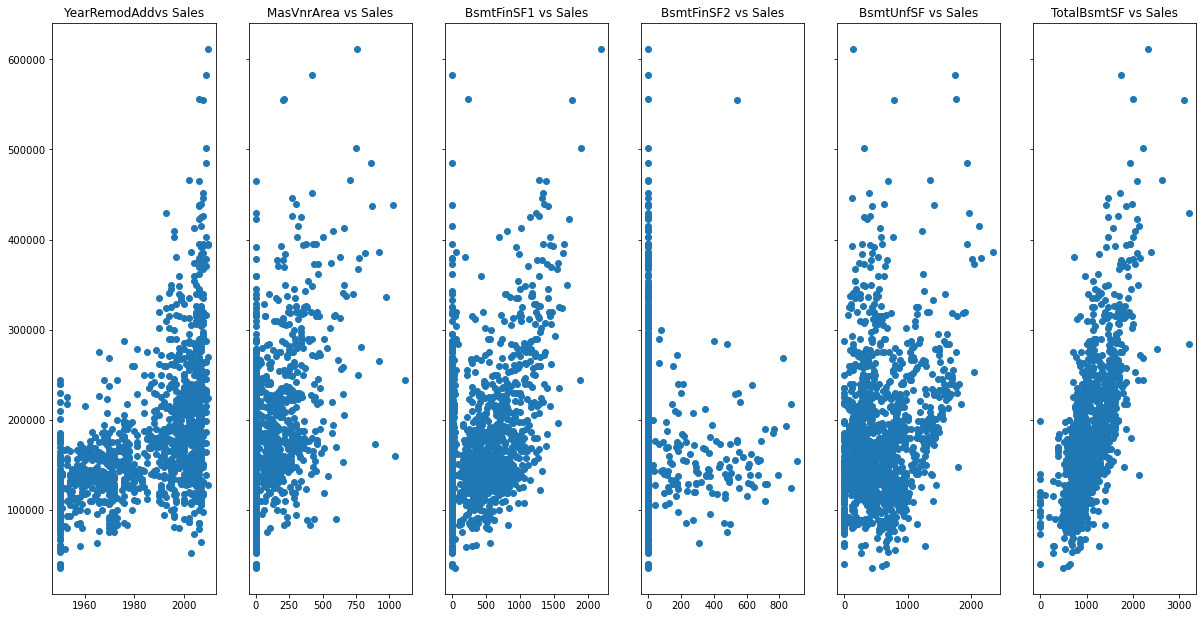

In [47]:
fig, ax = plt.subplots(ncols=6, sharey=True)

YearRemodAdd = ax[0].scatter(dt['YearRemodAdd'], dt['SalePrice'])
YearRemodAdd.set_label("YearRemodAdd")
ax[0].set_title('YearRemodAddvs Sales')

MasVnrArea= ax[1].scatter(dt['MasVnrArea'], dt['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
ax[1].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[2].scatter(dt['BsmtFinSF1'], dt['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
ax[2].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = ax[3].scatter(dt['BsmtFinSF2'], dt['SalePrice'])
BsmtFinSF2.set_label("BsmtFinSF2")
ax[3].set_title('BsmtFinSF2 vs Sales')

BsmtUnfSF = ax[4].scatter(dt['BsmtUnfSF'], dt['SalePrice'])
BsmtUnfSF.set_label("BsmtUnfSF")
ax[4].set_title('BsmtUnfSF vs Sales')

TotalBsmtSF = ax[5].scatter(dt['TotalBsmtSF'], dt['SalePrice'])
TotalBsmtSF.set_label("TotalBsmtSF")
ax[5].set_title('TotalBsmtSF vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

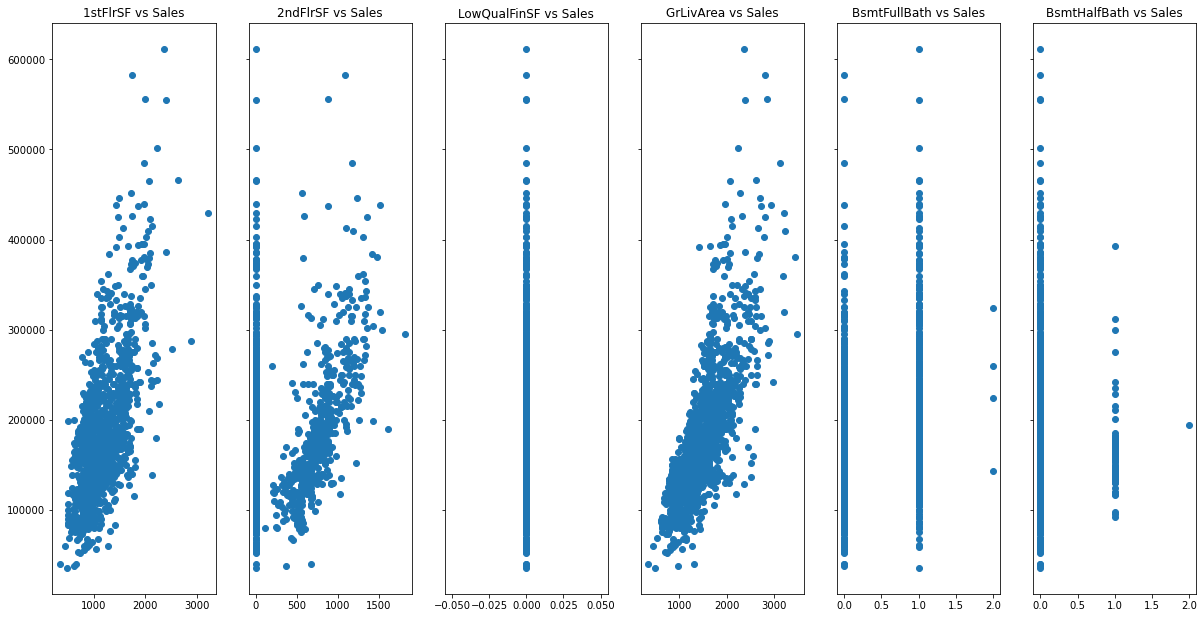

In [48]:
fig, ax = plt.subplots(ncols=6, sharey=True)

stFlrSF = ax[0].scatter(dt['1stFlrSF'], dt['SalePrice'])
stFlrSF.set_label("1stFlrSF")
ax[0].set_title('1stFlrSF vs Sales')

ndFlrSF= ax[1].scatter(dt['2ndFlrSF'], dt['SalePrice'])
ndFlrSF.set_label("2ndFlrSF")
ax[1].set_title('2ndFlrSF vs Sales')

LowQualFinSF = ax[2].scatter(dt['LowQualFinSF'], dt['SalePrice'])
LowQualFinSF.set_label("LowQualFinSF")
ax[2].set_title('LowQualFinSF vs Sales')

GrLivArea = ax[3].scatter(dt['GrLivArea'], dt['SalePrice'])
GrLivArea.set_label("GrLivArea")
ax[3].set_title('GrLivArea vs Sales')

BsmtFullBath = ax[4].scatter(dt['BsmtFullBath'], dt['SalePrice'])
BsmtFullBath.set_label("BsmtFullBath")
ax[4].set_title('BsmtFullBath vs Sales')

BsmtHalfBath = ax[5].scatter(dt['BsmtHalfBath'], dt['SalePrice'])
BsmtHalfBath.set_label("BsmtHalfBath")
ax[5].set_title('BsmtHalfBath vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

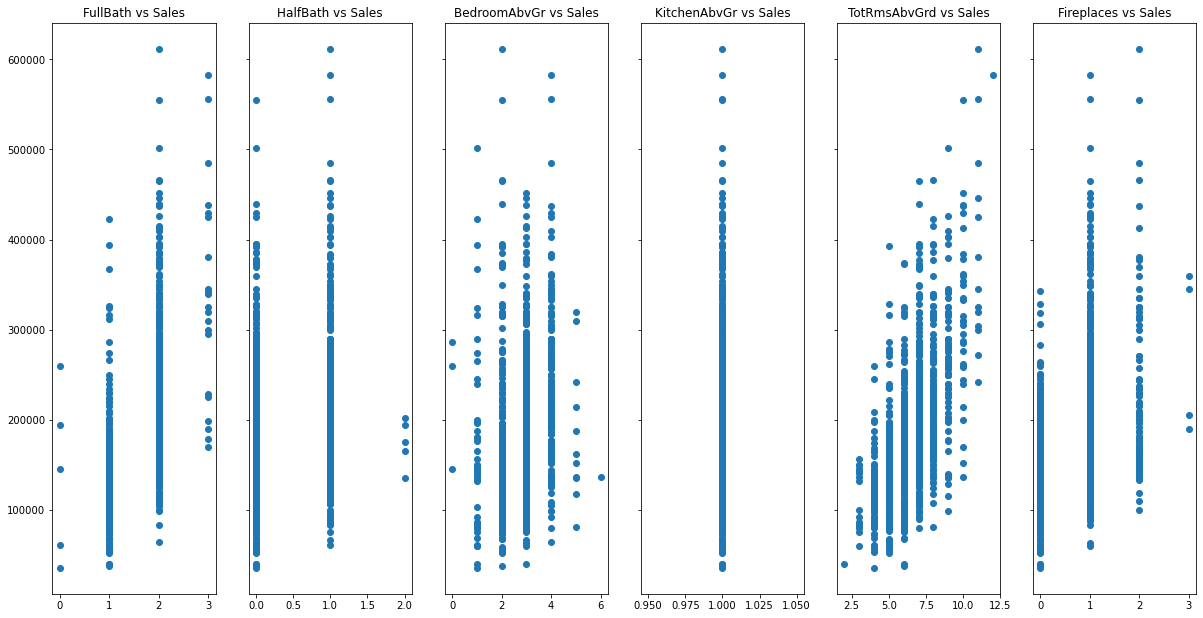

In [49]:
fig, ax = plt.subplots(ncols=6, sharey=True)

FullBath = ax[0].scatter(dt['FullBath'], dt['SalePrice'])
FullBath.set_label("FullBath")
ax[0].set_title('FullBath vs Sales')

HalfBath= ax[1].scatter(dt['HalfBath'], dt['SalePrice'])
HalfBath.set_label("HalfBath")
ax[1].set_title('HalfBath vs Sales')

BedroomAbvGr = ax[2].scatter(dt['BedroomAbvGr'], dt['SalePrice'])
BedroomAbvGr.set_label("BedroomAbvGr")
ax[2].set_title('BedroomAbvGr vs Sales')

KitchenAbvGr = ax[3].scatter(dt['KitchenAbvGr'], dt['SalePrice'])
KitchenAbvGr.set_label("KitchenAbvGr")
ax[3].set_title('KitchenAbvGr vs Sales')

TotRmsAbvGrd = ax[4].scatter(dt['TotRmsAbvGrd'], dt['SalePrice'])
TotRmsAbvGrd.set_label("TotRmsAbvGrd")
ax[4].set_title('TotRmsAbvGrd vs Sales')

Fireplaces = ax[5].scatter(dt['Fireplaces'], dt['SalePrice'])
Fireplaces.set_label("Fireplaces")
ax[5].set_title('Fireplaces vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

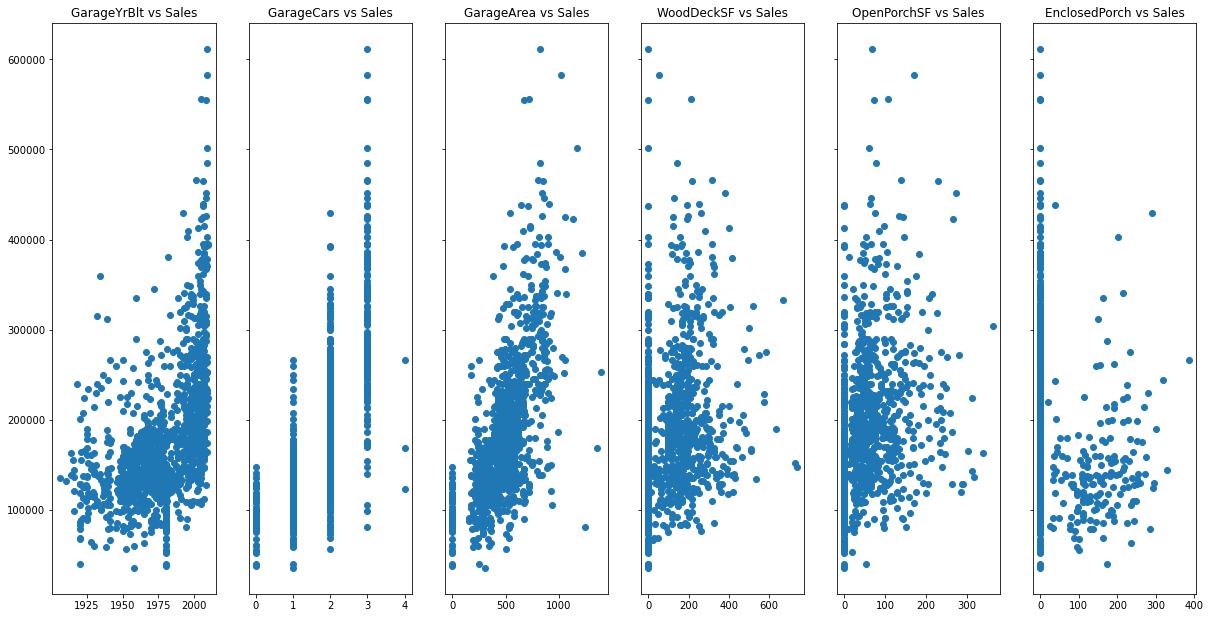

In [50]:
fig, ax = plt.subplots(ncols=6, sharey=True)

GarageYrBlt = ax[0].scatter(dt['GarageYrBlt'], dt['SalePrice'])
GarageYrBlt.set_label("GarageYrBlt")
ax[0].set_title('GarageYrBlt vs Sales')

GarageCars= ax[1].scatter(dt['GarageCars'], dt['SalePrice'])
GarageCars.set_label("GarageCars")
ax[1].set_title('GarageCars vs Sales')

GarageArea = ax[2].scatter(dt['GarageArea'], dt['SalePrice'])
GarageArea.set_label("GarageArea")
ax[2].set_title('GarageArea vs Sales')

WoodDeckSF = ax[3].scatter(dt['WoodDeckSF'], dt['SalePrice'])
WoodDeckSF.set_label("WoodDeckSF")
ax[3].set_title('WoodDeckSF vs Sales')

OpenPorchSF = ax[4].scatter(dt['OpenPorchSF'], dt['SalePrice'])
OpenPorchSF.set_label("OpenPorchSF")
ax[4].set_title('OpenPorchSF vs Sales')

EnclosedPorch = ax[5].scatter(dt['EnclosedPorch'], dt['SalePrice'])
EnclosedPorch.set_label("EnclosedPorch")
ax[5].set_title('EnclosedPorch vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

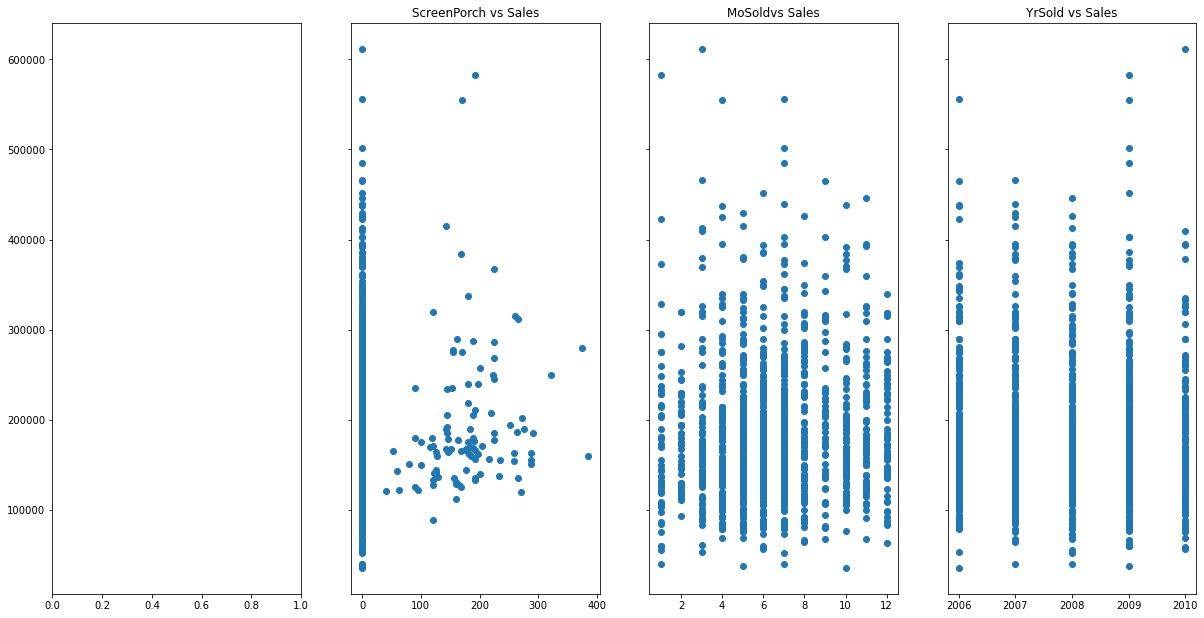

In [51]:
fig, ax = plt.subplots(ncols=4, sharey=True)


ScreenPorch= ax[1].scatter(dt['ScreenPorch'], dt['SalePrice'])
ScreenPorch.set_label("ScreenPorch")
ax[1].set_title('ScreenPorch vs Sales')

MoSold = ax[2].scatter(dt['MoSold'], dt['SalePrice'])
MoSold.set_label("MoSold")
ax[2].set_title('MoSoldvs Sales')

YrSold = ax[3].scatter(dt['YrSold'], dt['SalePrice'])
YrSold.set_label("YrSold")
ax[3].set_title('YrSold vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

In [52]:
dt.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

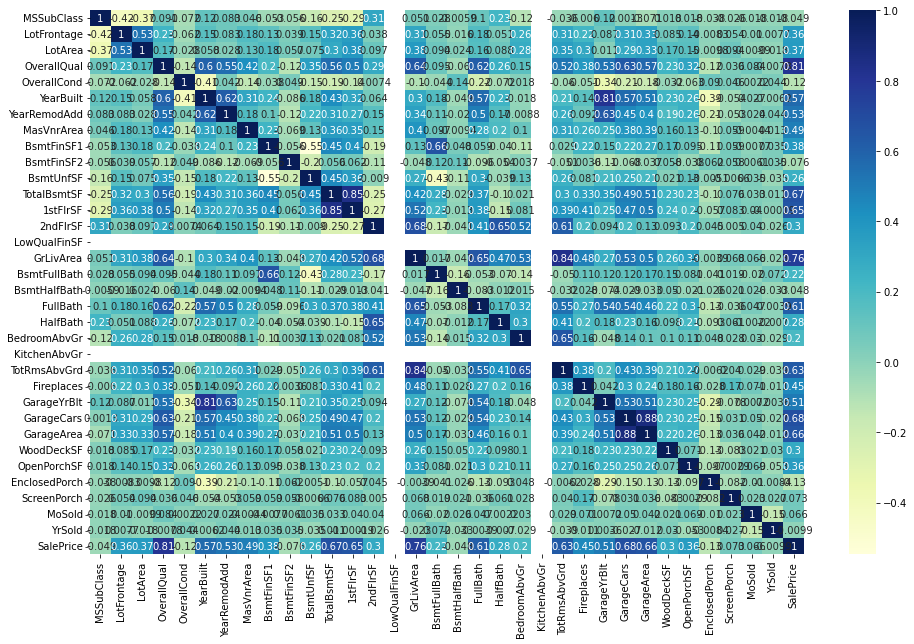

In [53]:
plt.figure(figsize = (16, 10))
sns.heatmap(dt.corr(), annot = True, cmap="YlGnBu")
plt.show()

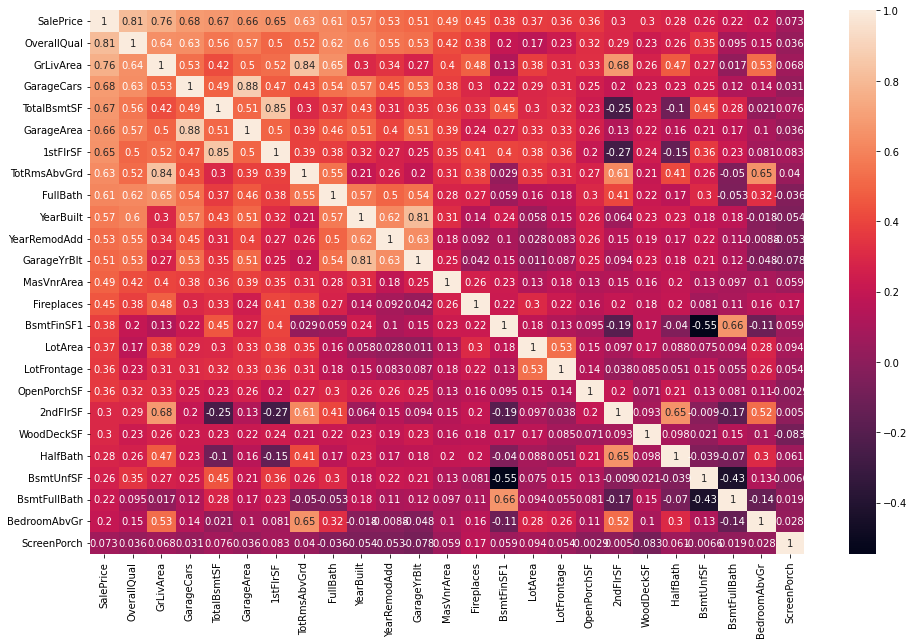

In [54]:
plt.figure(figsize = (16, 10))
n = 25 

# number of variables which have the highest correlation with 'Sales price'

corrmat = dt.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index

sns.heatmap(dt[cols].corr(),annot=True)
plt.show()

In [55]:
dt.select_dtypes(include='object').columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [56]:
dt=pd.get_dummies(dt,drop_first=True)
dt.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,5,2007,181500,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,2,2006,140000,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,12,2008,250000,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [57]:
y = dt.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [58]:
dt.shape

(1329, 221)

In [60]:
X = dt
X.shape

(1329, 221)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
X_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1082,20,70.0,8749,7,5,2002,2002,100.0,0,0,1459,1459,1459,0,0,1459,0,0,2,0,3,1,6,1,2002.0,2,527,192,39,0,0,9,2007,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
152,60,69.0,14803,6,5,1971,1971,252.0,416,0,409,825,1097,896,0,1993,0,0,2,1,4,1,8,1,1971.0,2,495,0,66,0,0,6,2006,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
345,50,65.0,6435,6,5,1939,1950,0.0,0,0,972,972,972,605,0,1577,0,0,1,0,3,1,6,1,1939.0,1,312,0,0,0,0,10,2006,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1217,20,72.0,8640,8,5,2009,2009,72.0,936,0,364,1300,1314,0,0,1314,1,0,2,0,3,1,6,0,2009.0,2,552,135,112,0,0,9,2009,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
900,20,69.0,7340,4,6,1971,1971,0.0,322,0,536,858,858,0,0,858,0,0,1,0,2,1,4,0,1979.0,1,684,0,0,0,0,6,2007,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [64]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (890, 221)
X_test shape (439, 221)
y_train shape (890,)
y_test shape (439,)


In [65]:
y_train.head()

1082    192000
152     190000
345     140200
1217    229456
900     110000
Name: SalePrice, dtype: int64

In [66]:
X_test.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
987,20,83.0,10159,9,5,2009,2010,450.0,1646,0,284,1930,1940,0,0,1940,1,0,2,1,3,1,8,1,2010.0,3,606,168,95,0,0,4,2010,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
129,20,69.0,8973,5,7,1958,1991,85.0,567,28,413,1008,1053,0,0,1053,0,1,1,1,3,1,6,0,1998.0,2,750,0,80,0,0,7,2006,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
578,160,34.0,3604,7,5,2007,2007,0.0,0,0,689,689,703,689,0,1392,0,0,2,0,2,1,5,0,2007.0,2,540,0,102,0,0,2,2008,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
199,20,76.0,9591,8,5,2004,2005,262.0,1088,0,625,1713,1713,0,0,1713,1,0,2,0,3,1,7,1,2004.0,3,856,0,26,0,170,1,2009,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
70,20,95.0,13651,7,6,1973,1973,1115.0,1880,0,343,2223,2223,0,0,2223,1,0,2,0,3,1,8,2,1973.0,2,516,300,0,0,0,2,2007,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [67]:
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [68]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
1082,20,70.0,8749,7,5,2002,2002,100.0,0,0,1459,1459,1459,0,0,1459,0,0,2,0,3,1,6,1,2002.0,2,527,192,39,0,0,9,2007
152,60,69.0,14803,6,5,1971,1971,252.0,416,0,409,825,1097,896,0,1993,0,0,2,1,4,1,8,1,1971.0,2,495,0,66,0,0,6,2006
345,50,65.0,6435,6,5,1939,1950,0.0,0,0,972,972,972,605,0,1577,0,0,1,0,3,1,6,1,1939.0,1,312,0,0,0,0,10,2006
1217,20,72.0,8640,8,5,2009,2009,72.0,936,0,364,1300,1314,0,0,1314,1,0,2,0,3,1,6,0,2009.0,2,552,135,112,0,0,9,2009
900,20,69.0,7340,4,6,1971,1971,0.0,322,0,536,858,858,0,0,858,0,0,1,0,2,1,4,0,1979.0,1,684,0,0,0,0,6,2007


In [69]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,890.000000,890.000000,890.000000,890.000000,890.00000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.0,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.0,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,...,890.0,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.0,890.000000,890.000000,890.000000,890.00000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.0,890.000000,890.000000,890.000000,890.000000
mean,53.314607,69.124719,9589.150562,6.115730,5.60000,1973.793258,1985.655056,99.693258,431.159551,39.651685,573.560674,1044.371910,1132.657303,330.079775,0.0,1462.737079,0.401124,0.057303,1.523596,0.402247,2.800000,1.0,6.347191,0.607865,1979.426966,1.769663,470.304494,91.551685,43.170787,20.847191,14.729213,6.317978,2007.804494,0.048315,0.007865,0.805618,0.133708,0.996629,0.024719,0.007865,0.626966,0.035955,0.016854,0.914607,0.001124,0.057303,0.034831,0.003371,0.737079,0.035955,...,0.0,0.001124,0.024719,0.162921,0.001124,0.276404,0.959551,0.010112,0.0,0.001124,0.923596,0.023596,0.42809,0.483146,0.003371,0.021348,0.019101,0.008989,0.001124,0.939326,0.660674,0.011236,0.068539,0.004494,0.253933,0.308989,0.444944,0.029213,0.010112,0.001124,0.959551,0.022472,0.006742,0.002247,0.968539,0.016854,0.938202,0.004494,0.001124,0.004494,0.004494,0.004494,0.092135,0.001124,0.849438,0.0,0.002247,0.017978,0.808989,0.094382
std,39.475924,19.913739,4029.701176,1.341171,1.08968,28.851194,20.521905,165.832275,414.335891,135.032221,431.469268,385.313654,353.875320,412.295248,0.0,461.121812,0.492690,0.237340,0.530302,0.499714,0.733575,0.0,1.470259,0.620375,23.669161,0.706535,197.393985,120.308537,58.293139,57.965926,52.139854,2.692951,1.335667,0.214551,0.088386,0.395947,0.340530,0.057993,0.155355,0.088386,0.483883,0.186283,0.128796,0.279623,0.033520,0.232552,0.183456,0.057993,0.440468,0.186283,...,0.0,0.033520,0.155355,0.369502,0.033520,0.447471,0.197122,0.100107,0.0,0.033520,0.265794,0.151871,0.49508,0.499997,0.057993,0.1446

In [70]:
X_train.shape


(890, 221)

In [71]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1082,20,70.0,8749,7,5,2002,2002,100.0,0,0,1459,1459,1459,0,0,1459,0,0,2,0,3,1,6,1,2002.0,2,527,192,39,0,0,9,2007,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
152,60,69.0,14803,6,5,1971,1971,252.0,416,0,409,825,1097,896,0,1993,0,0,2,1,4,1,8,1,1971.0,2,495,0,66,0,0,6,2006,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
345,50,65.0,6435,6,5,1939,1950,0.0,0,0,972,972,972,605,0,1577,0,0,1,0,3,1,6,1,1939.0,1,312,0,0,0,0,10,2006,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1217,20,72.0,8640,8,5,2009,2009,72.0,936,0,364,1300,1314,0,0,1314,1,0,2,0,3,1,6,0,2009.0,2,552,135,112,0,0,9,2009,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
900,20,69.0,7340,4,6,1971,1971,0.0,322,0,536,858,858,0,0,858,0,0,1,0,2,1,4,0,1979.0,1,684,0,0,0,0,6,2007,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [72]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()

In [73]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [74]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1082,0.000000,0.304348,0.239033,0.666667,0.500,0.940741,0.866667,0.095511,0.000000,0.0,0.624572,0.455084,0.388735,0.000000,0.0,0.361388,0.0,0.0,0.666667,0.0,0.500000,0.0,0.4,0.333333,0.916667,0.50,0.388643,0.263736,0.107143,0.0,0.0,0.727273,0.25,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
152,0.235294,0.298137,0.433302,0.555556,0.500,0.711111,0.350000,0.240688,0.218487,0.0,0.175086,0.257330,0.263649,0.588313,0.0,0.532926,0.0,0.0,0.666667,0.5,0.666667,0.0,0.6,0.333333,0.593750,0.50,0.365044,0.000000,0.181319,0.0,0.0,0.454545,0.00,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
345,0.176471,0.273292,0.164779,0.555556,0.500,0.474074,0.000000,0.000000,0.000000,0.0,0.416096,0.303182,0.220456,0.397242,0.0,0.399293,0.0,0.0,0.333333,0.0,0.500000,0.0,0.4,0.333333,0.260417,0.25,0.230088,0.000000,0.000000,0.0,0.0,0.818182,0.00,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1217,0.000000,0.316770,0.235536,0.777778,0.500,0.992593,0.983333,0.068768,0.491597,0.0,0.155822,0.405490,0.338632,0.000000,0.0,0.314809,0.5,0.0,0.666667,0.0,0.500000,0.0,0.4,0.000000,0.989583,0.50,0.407080,0.185440,0.307692,0.0,0.0,0.727273,0.75,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
900,0.000000,0.298137,0.193820,0.333333,0.625,0.711111,0.350000,0.000000,0.169118,0.0,0.229452,0.267623,0.181064,0.000000,0.0,0.168326,0.0,0.0,0.333333,0.0,0.333333,0.0,0.2,0.000000,0.677083,0.25,0.504425,0.000000,0.000000,0.0,0.0,0.454545,0.25,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [75]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
987,0.000000,0.385093,0.284279,0.888889,0.500,0.992593,1.000000,0.429799,0.864496,0.000000,0.121575,0.601996,0.554941,0.000000,0.0,0.515901,0.5,0.0,0.666667,0.5,0.500000,0.0,0.6,0.333333,1.000000,0.75,0.446903,0.230769,0.260989,0.0,0.000000,0.272727,1.00,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
129,0.000000,0.298137,0.246221,0.444444,0.750,0.614815,0.683333,0.081184,0.297794,0.030905,0.176798,0.314410,0.248445,0.000000,0.0,0.230967,0.0,0.5,0.333333,0.5,0.500000,0.0,0.4,0.000000,0.875000,0.50,0.553097,0.000000,0.219780,0.0,0.000000,0.545455,0.00,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
578,0.823529,0.080745,0.073934,0.666667,0.500,0.977778,0.950000,0.000000,0.000000,0.000000,0.294949,0.214910,0.127505,0.452397,0.0,0.339865,0.0,0.0,0.666667,0.0,0.333333,0.0,0.3,0.000000,0.968750,0.50,0.398230,0.000000,0.280220,0.0,0.000000,0.090909,0.50,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
199,0.000000,0.341615,0.266053,0.777778,0.500,0.955556,0.916667,0.250239,0.571429,0.000000,0.267551,0.534311,0.476503,0.000000,0.0,0.442981,0.5,0.0,0.666667,0.0,0.500000,0.0,0.5,0.333333,0.937500,0.75,0.631268,0.000000,0.071429,0.0,0.441558,0.000000,0.75,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
70,0.000000,0.459627,0.396335,0.666667,0.625,0.725926,0.383333,1.064947,0.987395,0.000000,0.146832,0.693387,0.652730,0.000000,0.0,0.606810,0.5,0.0,0.666667,0.0,0.500000,0.0,0.6,0.666667,0.614583,0.50,0.380531,0.412088,0.000000,0.0,0.000000,0.090909,0.25,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [76]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,890.000000,890.000000,890.000000,890.000000,890.00000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.0,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.0,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,...,890.0,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.0,890.000000,890.000000,890.000000,890.00000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.0,890.000000,890.000000,890.000000,890.000000
mean,0.195968,0.298911,0.265993,0.568414,0.57500,0.731802,0.594251,0.095218,0.226449,0.043766,0.245531,0.325755,0.275970,0.216730,0.0,0.362588,0.200562,0.028652,0.507865,0.201124,0.466667,0.0,0.434719,0.202622,0.681531,0.442416,0.346832,0.125758,0.118601,0.071151,0.038258,0.483453,0.451124,0.048315,0.007865,0.805618,0.133708,0.996629,0.024719,0.007865,0.626966,0.035955,0.016854,0.914607,0.001124,0.057303,0.034831,0.003371,0.737079,0.035955,...,0.0,0.001124,0.024719,0.162921,0.001124,0.276404,0.959551,0.010112,0.0,0.001124,0.923596,0.023596,0.42809,0.483146,0.003371,0.021348,0.019101,0.008989,0.001124,0.939326,0.660674,0.011236,0.068539,0.004494,0.253933,0.308989,0.444944,0.029213,0.010112,0.001124,0.959551,0.022472,0.006742,0.002247,0.968539,0.016854,0.938202,0.004494,0.001124,0.004494,0.004494,0.004494,0.092135,0.001124,0.849438,0.0,0.002247,0.017978,0.808989,0.094382
std,0.232211,0.123688,0.129310,0.149019,0.13621,0.213713,0.342032,0.158388,0.217613,0.149042,0.184704,0.120185,0.122279,0.270713,0.0,0.148128,0.246345,0.118670,0.176767,0.249857,0.122263,0.0,0.147026,0.206792,0.246554,0.176634,0.145571,0.165259,0.160146,0.197836,0.135428,0.244814,0.333917,0.214551,0.088386,0.395947,0.340530,0.057993,0.155355,0.088386,0.483883,0.186283,0.128796,0.279623,0.033520,0.232552,0.183456,0.057993,0.440468,0.186283,...,0.0,0.033520,0.155355,0.369502,0.033520,0.447471,0.197122,0.100107,0.0,0.033520,0.265794,0.151871,0.49508,0.499997,0.057993,0.144624,0.136957,0.094435,0.033520,0.238866,0.473747,0.105462,0.252811,0.066

In [77]:
X_train.shape

(890, 221)

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [79]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [80]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 177),
 ('LotFrontage', False, 47),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 155),
 ('MasVnrArea', False, 80),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 13),
 ('BsmtUnfSF', False, 12),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 35),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 176),
 ('BsmtHalfBath', False, 169),
 ('FullBath', False, 63),
 ('HalfBath', False, 133),
 ('BedroomAbvGr', False, 45),
 ('KitchenAbvGr', False, 32),
 ('TotRmsAbvGrd', False, 3),
 ('Fireplaces', False, 128),
 ('GarageYrBlt', False, 92),
 ('GarageCars', False, 71),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 68),
 ('OpenPorchSF', False, 82),
 ('EnclosedPorch', False, 163),
 ('ScreenPorch', False, 70),
 ('MoSold', False, 160),
 ('YrSold', False, 170),
 ('MSZoning_FV', False, 5),
 ('MSZoning_RH', False, 6),
 ('MSZoning_RL', False, 7),
 (

In [81]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr',
       'Exterior1st_BrkComm', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_Slab', 'BsmtCond_Po', 'Electrical_Mix', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev', 'GarageQual_Po'],
      dtype='object')

In [82]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=196)

In [83]:
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(890, 25)
(439, 25)
(890,)
(439,)


In [84]:
lm1=lm.fit(X_train, y_train)

In [85]:
print(lm1.intercept_)
print(lm1.coef_)

5.772255812839843e+16
[-1.06882188e+03  9.72519325e+03  4.20189166e+04  4.91505828e+04
  4.18208502e+04  2.89891139e+04  2.68002872e+03  7.38281730e+03
  1.34206053e+17  6.38606533e+16  1.64656166e+17 -2.25979310e+17
  1.04978785e+17  5.52462643e+16 -1.02713700e+17 -1.12922929e+17
 -1.64487500e+03 -2.65150000e+03  1.52620000e+04  1.26500000e+03
 -2.38890000e+04 -3.85954024e+16  2.15100000e+04  2.94200000e+03
  6.20400000e+03  1.46960000e+04  2.00540000e+04  1.40110000e+04
  1.10430000e+04  1.68800000e+03  1.28117500e+04 -2.66425000e+03
 -1.27800000e+03  7.23760000e+04  6.64010000e+04  5.43680000e+04
  4.81520000e+04  8.53600000e+03 -3.19500000e+02 -2.37350000e+03
  3.07000000e+03  1.25500000e+04 -8.75300000e+03  4.97000000e+03
 -2.03185000e+04  7.02500000e+03 -9.19500000e+03 -1.42397500e+04
 -2.20050000e+03  3.08500000e+03 -3.36000000e+04  5.56537500e+03
  8.27125000e+03  1.02650000e+04 -1.30175000e+04 -6.58375000e+03
  2.34010000e+04 -1.38260000e+04 -6.44725000e+03  5.43900000e+03
 -2

In [86]:
from sklearn.metrics import r2_score, mean_squared_error

In [87]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9092360826380117
0.8632483157379449
440595889608.07764
365573233410.7612
495051561.3573906
832740850.5939891


Rigde and lasso regression 

In [88]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [89]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 2.0}
-16446.40092947365


In [91]:
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 42584.90691602,  81493.66545554,  35857.49980391,  57604.10253901,
        34288.5181344 ,  98966.20709689,  65204.64362473,  44191.23364914,
        82237.54818427,  48066.47449209, -33621.75597668,  29237.73821491,
        37118.96607717, -31691.73127798, -43390.68631702, -50235.24873055,
       -59241.68075449,  22087.7072074 ,  19757.10317453, -11576.21726652,
       -36567.95395511, -39606.94605051, -43413.80923373, -45855.86809731,
       -11576.21726652])

In [92]:
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9074070937404233
0.8690545737721277
449474362616.27045
350051577973.55396
505027373.7261466
797384004.4955671


In [93]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-16678.824345147463


In [95]:
alpha =10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=10)

In [96]:
lasso.coef_


array([ 4.42400070e+04,  8.06180086e+04,  3.99566823e+04,  5.89781938e+04,
        3.22815578e+04,  1.17753776e+05,  0.00000000e+00,  1.59708934e+04,
        1.45058291e+05,  4.71400336e+04, -4.47414161e+04,  2.94347409e+04,
        3.83542152e+04, -5.47510287e+04, -5.07014010e+04, -5.36903982e+04,
       -6.16273707e+04,  3.03146595e+04,  5.29984704e+04, -5.70330199e+04,
       -3.60040394e+04, -3.93520078e+04, -4.26288282e+04, -8.37562213e+04,
       -3.42726809e+00])

In [97]:
y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9090428507782562
0.865483730873819
441533896314.091
359597380581.9885
496105501.47650677
819128429.5717279


In [98]:
metric2

[0.9074070937404233,
 0.8690545737721277,
 449474362616.27045,
 350051577973.55396,
 22472.81410340384,
 28237.98867652523]

In [99]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.092361e-01,9.074071e-01,9.090429e-01
1,R2 Score (Test),8.632483e-01,8.690546e-01,8.654837e-01
2,RSS (Train),4.405959e+11,4.494744e+11,4.415339e+11
3,RSS (Test),3.655732e+11,3.500516e+11,3.595974e+11
4,MSE (Train),2.224975e+04,2.247281e+04,2.227343e+04
5,MSE (Test),2.885725e+04,2.823799e+04,2.862042e+04


In [100]:
ridge_pred = ridge.predict(X_test1)

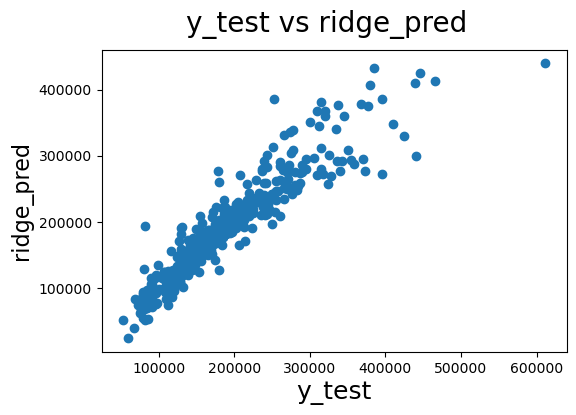

In [101]:
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

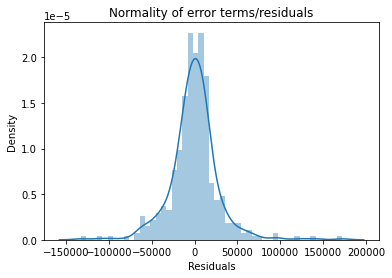

In [102]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()


In [103]:
lasso_pred = lasso.predict(X_test1)

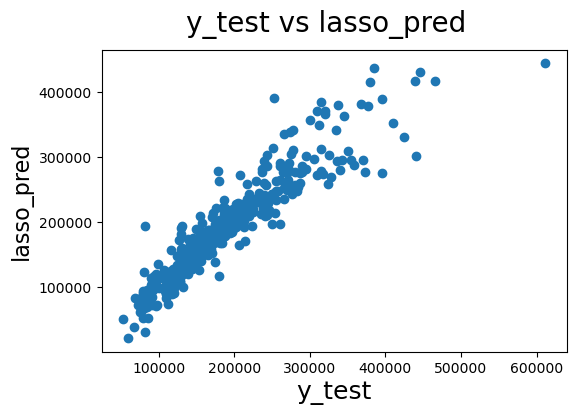

In [104]:
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

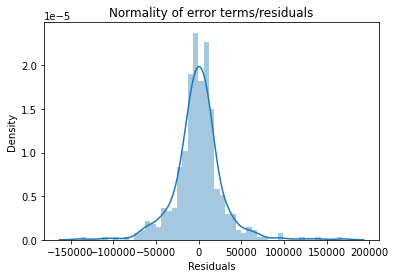

In [105]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [106]:
betas = pd.DataFrame(index=X_train1.columns)


In [107]:
betas.rows = X_train1.columns


In [108]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [109]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
LotArea,42584.906916,44240.006998
OverallQual,81493.665456,80618.008639
OverallCond,35857.499804,39956.682313
YearBuilt,57604.102539,58978.193819
BsmtFinSF1,34288.518134,32281.557763
TotalBsmtSF,98966.207097,117753.776435
1stFlrSF,65204.643625,0.000000
2ndFlrSF,44191.233649,15970.893379
GrLivArea,82237.548184,145058.290599
GarageArea,48066.474492,47140.033645


### Which variables are significant in predicting the price of a house?

In [ ]:
The below mentioned variables are significant in predicting the price

LotArea          :        Lot size in square feet
OverallQual      :        Rates the overall material and finish of the house
OverallCond      :        Rates the overall condition of the house
YearBuilt        :        Original construction date
BsmtFinSF1       :        Type 1 finished square feet
TotalBsmtSF      :        Total square feet of basement area
GrLivArea        :        Above grade (ground) living area square feet
TotRmsAbvGrd     :        Total rooms above grade (does not include bathrooms)
Street_Pave      :        Pave road access to property
RoofMatl_Metal   :        Roof material_Metal

### How well those variables describe the price of a house?

In [ ]:
                     Ridge Regression               Lasso Regression
R2 score(Train)           0.88                          0.88

R2 score(Test)            0.87                          0.86

In [110]:
final_metric


,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.092361e-01,9.074071e-01,9.090429e-01
1,R2 Score (Test),8.632483e-01,8.690546e-01,8.654837e-01
2,RSS (Train),4.405959e+11,4.494744e+11,4.415339e+11
3,RSS (Test),3.655732e+11,3.500516e+11,3.595974e+11
4,MSE (Train),2.224975e+04,2.247281e+04,2.227343e+04
5,MSE (Test),2.885725e+04,2.823799e+04,2.862042e+04


In [111]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
LotArea,42584.906916,44240.006998
OverallQual,81493.665456,80618.008639
OverallCond,35857.499804,39956.682313
YearBuilt,57604.102539,58978.193819
BsmtFinSF1,34288.518134,32281.557763
TotalBsmtSF,98966.207097,117753.776435
1stFlrSF,65204.643625,0.000000
2ndFlrSF,44191.233649,15970.893379
GrLivArea,82237.548184,145058.290599
GarageArea,48066.474492,47140.033645


The end
